# Dataset Prepartion
## Dataset Loading
### Load the JSON files into Data Frame

In [1]:
import os
import pandas as pd

file_path = os.path.join(os.getcwd(),'../../data/processed_data/')
df = pd.read_csv(file_path+'amazon_reviews.csv')

In [2]:
df.shape

(1497248, 2)

## Field Selection

In [3]:
df = df.rename({"reviewText" : "Reviews"}, axis=1)
df = df.rename({"overall" : "Score"}, axis=1)
df = df [["Score", "Reviews"]]
df.head()

,Score,Reviews
0,5,This handcream has a beautiful fragrance. It d...
1,5,"wonderful hand lotion, for seriously dry skin,..."
2,5,"Best hand cream around. Silky, thick, soaks i..."
3,5,Thanks!!
4,5,Great hand lotion. Soaks right in and leaves ...


## Missing and Duplicate Data Checks

In [4]:
def missing_checker(df):
    missing_reviews = df.isnull()
    
    print("Missing data:\n", missing_reviews.sum())
    print(df[missing_reviews.any(axis=1)])

missing_checker(df)

Missing data:
 Score      0
Reviews    1
dtype: int64
       Score Reviews
41454      5     NaN


In [5]:
# Drop Missing Data
df.dropna(inplace=True)

# Check again
missing_checker(df)

Missing data:
 Score      0
Reviews    0
dtype: int64
Empty DataFrame
Columns: [Score, Reviews]
Index: []


In [6]:
def duplicate_checker(df):
    # Get the duplicate reviews
    duplicate_reviews = df.duplicated(subset='Reviews')
    
    print("Duplicate Reviews:\n", duplicate_reviews.sum())
    
    duplicate_rows = df[duplicate_reviews]
    print(duplicate_rows['Reviews'])

duplicate_checker(df)

Duplicate Reviews:
 0
Series([], Name: Reviews, dtype: object)


In [7]:
# Remove the duplicates but keep the first instance
df.drop_duplicates(subset='Reviews', keep='first', inplace=True)
duplicate_checker(df)

Duplicate Reviews:
 0
Series([], Name: Reviews, dtype: object)


## Feedback Mapping of Scores

In [8]:
import numpy as np                       # MD array and Matrices

conditions = [
    (df['Score'] >= 4),
    (df['Score'] == 3),
    (df['Score'] <= 2)
    ]
feedback_values = ['Positive',
                   'Neutral',
                   'Negative']
df['Feedback'] = np.select(conditions, feedback_values)


feedback_counts = df['Feedback'].value_counts()
print(feedback_counts)

Feedback
Positive    1257278
Negative     125846
Neutral      114123
Name: count, dtype: int64


<Axes: xlabel='Feedback'>

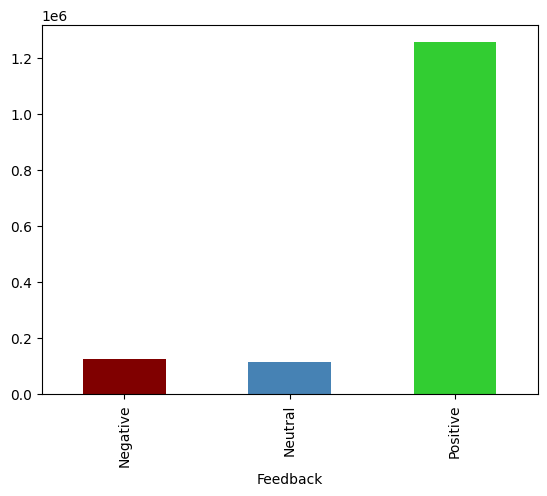

In [9]:
import matplotlib.pyplot as plt  # Data Visualization

df['Feedback'].value_counts().sort_index().plot.bar(color=['maroon', 'steelblue', 'limegreen'])

In [10]:
print("Total number of reviews:",df.shape[0])
df.head()

Total number of reviews: 1497247


,Score,Reviews,Feedback
0,5,This handcream has a beautiful fragrance. It d...,Positive
1,5,"wonderful hand lotion, for seriously dry skin,...",Positive
2,5,"Best hand cream around. Silky, thick, soaks i...",Positive
3,5,Thanks!!,Positive
4,5,Great hand lotion. Soaks right in and leaves ...,Positive


In [11]:
print("Total number of reviews:",df.shape[0])
df.head()

Total number of reviews: 1497247


,Score,Reviews,Feedback
0,5,This handcream has a beautiful fragrance. It d...,Positive
1,5,"wonderful hand lotion, for seriously dry skin,...",Positive
2,5,"Best hand cream around. Silky, thick, soaks i...",Positive
3,5,Thanks!!,Positive
4,5,Great hand lotion. Soaks right in and leaves ...,Positive


# Data Preprocessing

In [12]:
import sys
sys.path.append('..')
from data_preprocess import text_cleaner

#Test the imported module
text = "I’m never gonna give you up. But I shouldn't say that I can't bear to lose you.\n https://youtube.com <strong> Bold and brash </strong> \n<a href='https://www.w3schools.com'>Visit W3Schools</a>"
cleaned_words = text_cleaner(text)
print(cleaned_words)

never going give not say cannot bear lose bold brash visit w3schools


In [13]:
df['Reviews'] = df['Reviews'].apply(text_cleaner)

In [14]:
# Check for missing and dupe data again isn't substantial that text cleaner wiped it out.
missing_checker(df)
duplicate_checker(df)

Missing data:
 Score       0
Reviews     0
Feedback    0
dtype: int64
Empty DataFrame
Columns: [Score, Reviews, Feedback]
Index: []
Duplicate Reviews:
 57085
75                                                        ok
112                                               love color
114                                               love color
116                                          beautiful color
127                                          beautiful color
                                 ...                        
1496866                                             expected
1496914                                         nice product
1496943                                        ok advertised
1497004    love bullets feel good hand fondled pocket sle...
1497170                               great product purchase
Name: Reviews, Length: 57085, dtype: object


In [15]:
# Drop
df.dropna(inplace=True)
missing_checker(df)
df.drop_duplicates(subset='Reviews', keep='first', inplace=True)
duplicate_checker(df)

Missing data:
 Score       0
Reviews     0
Feedback    0
dtype: int64
Empty DataFrame
Columns: [Score, Reviews, Feedback]
Index: []
Duplicate Reviews:
 0
Series([], Name: Reviews, dtype: object)


In [16]:
df.head()
df.shape

(1440162, 3)

In [17]:
# Save the DataFrame to the new CSV file
file_path = os.path.join(os.getcwd(),'../../data/processed_data/')
df.to_csv(os.path.join(file_path, 'prep_reviews.csv'), index=False, encoding='utf-8')

# PROCEED TO MODEL TRAINING